In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [17]:
from datetime import datetime
from os import path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.naive_bayes import CategoricalNB
from cafeen import utils
mpl.style.use('ggplot')

In [18]:
df, _ = utils.read_data()

In [19]:
df = df.fillna(value='nan')

In [20]:
features = utils.get_features(df.columns)

In [6]:
df = utils.label_encoding(df, features)

In [26]:
def show_feature(df, feature):    
    train_index = df['target'] > -1
    test_index = df['target'] == -1
    _train = df[train_index].groupby(feature)['target'].agg(['mean', 'count'])
    _test = df[test_index].groupby(feature)['target'].agg(['count'])
    _train['p_train'] = _train['count'] / train_index.sum()
    _train['p_test'] = _test['count'] / test_index.sum()
    _df = _train.merge(_test, how='left', left_index=True, right_index=True)
    
    mask=_df.index != 'nan'
    p_nan = np.sum(_df[mask]['mean']*_df[mask]['count_x']/_df[mask]['count_x'].sum())
    return _df, p_nan

In [27]:
_df, p_nan = show_feature(df, features[0])
print(f'p_nan: {p_nan:.5f}')
_df.style.background_gradient(cmap='Pastel1')

p_nan: 0.18717


,mean,count_x,p_train,p_test,count_y
bin_0,,,,,
0.0,0.194674,528377,0.880628,0.879443,351777
1.0,0.113365,53729,0.0895483,0.090805,36322
nan,0.188387,17894,0.0298233,0.0297525,11901


In [28]:
_df, p_nan = show_feature(df, features[1])
print(f'p_nan: {p_nan:.5f}')
_df.style.background_gradient(cmap='Pastel1')

p_nan: 0.18717


,mean,count_x,p_train,p_test,count_y
bin_1,,,,,
0.0,0.19056,474018,0.79003,0.788382,315353
1.0,0.172274,107979,0.179965,0.181523,72609
nan,0.188413,18003,0.030005,0.030095,12038


In [29]:
_df, p_nan = show_feature(df, features[10])
print(f'p_nan: {p_nan:.5f}')
_df.tail(10).style.background_gradient(cmap='Pastel1')

p_nan: 0.18737


,mean,count_x,p_train,p_test,count_y
nom_5,,,,,
fd943bc67,0.161765,476,0.000793333,0.0008425,337
fde0ee528,0.208,625,0.00104167,0.0011075,443
fe2d7e137,0.170921,901,0.00150167,0.0015075,603
fe8c04829,0.228986,345,0.000575,0.00062,248
feaf3a39e,0.178571,168,0.00028,0.0002725,109
febb8819e,0.198492,796,0.00132667,0.00136,544
ff20ed762,0.168731,646,0.00107667,0.0011275,451
ffac417f9,0.210663,769,0.00128167,0.001205,482
ffd9a460b,0.203354,477,0.000795,0.00078,312


In [30]:
_df, p_nan = show_feature(df, features[22])
print(f'p_nan: {p_nan:.5f}')
_df.style.background_gradient(cmap='Pastel1')

p_nan: 0.18723


,mean,count_x,p_train,p_test,count_y
month,,,,,
1.0,0.121793,52154,0.0869233,0.0865275,34611
2.0,0.113907,40700,0.0678333,0.06732,26928
3.0,0.146451,70160,0.116933,0.118407,47363
4.0,0.163473,14614,0.0243567,0.0239225,9569
5.0,0.175471,68906,0.114843,0.11474,45896
6.0,0.229951,60478,0.100797,0.100752,40301
7.0,0.209293,53480,0.0891333,0.0890725,35629
8.0,0.190094,79245,0.132075,0.13318,53272
9.0,0.211688,20620,0.0343667,0.03363,13452


In [31]:
_df, p_nan = show_feature(df, features[21])
print(f'p_nan: {p_nan:.5f}')
_df.style.background_gradient(cmap='Pastel1')

p_nan: 0.18747


,mean,count_x,p_train,p_test,count_y
day,,,,,
1.0,0.213682,84724,0.141207,0.141313,56525
2.0,0.19916,65495,0.109158,0.109552,43821
3.0,0.16408,113835,0.189725,0.189915,75966
4.0,0.143388,23663,0.0394383,0.0394475,15779
5.0,0.163537,110464,0.184107,0.184193,73677
6.0,0.199832,97432,0.162387,0.161227,64491
7.0,0.21246,86435,0.144058,0.14429,57716
nan,0.178532,17952,0.02992,0.0300625,12025


In [33]:
_df, p_nan = show_feature(df, features[19])
print(f'p_nan: {p_nan:.5f}')
_df.style.background_gradient(cmap='Pastel1')

p_nan: 0.18715


,mean,count_x,p_train,p_test,count_y
ord_4,,,,,
A,0.136707,36633,0.061055,0.061195,24478
B,0.135848,25212,0.04202,0.0417625,16705
C,0.138982,32112,0.05352,0.0528325,21133
D,0.145221,17284,0.0288067,0.0285025,11401
E,0.150199,21871,0.0364517,0.036635,14654
F,0.156629,16721,0.0278683,0.027885,11154
G,0.161281,3404,0.00567333,0.005725,2290
H,0.162365,31189,0.0519817,0.0512525,20501
I,0.165463,19805,0.0330083,0.0328075,13123


In [34]:
_df, p_nan = show_feature(df, features[18])
print(f'p_nan: {p_nan:.5f}')
_df.style.background_gradient(cmap='Pastel1')

p_nan: 0.18717


,mean,count_x,p_train,p_test,count_y
ord_3,,,,,
a,0.091502,65321,0.108868,0.109063,43625
b,0.102891,44795,0.0746583,0.07364,29456
c,0.113524,56675,0.0944583,0.09472,37888
d,0.124078,30634,0.0510567,0.05138,20552
e,0.135513,38904,0.06484,0.06407,25628
f,0.151036,29450,0.0490833,0.0494275,19771
g,0.171845,6180,0.0103,0.0105075,4203
h,0.182082,55744,0.0929067,0.092435,36974
i,0.196071,34763,0.0579383,0.0586325,23453


In [12]:
np.mean(prob)

0.18625901675425788

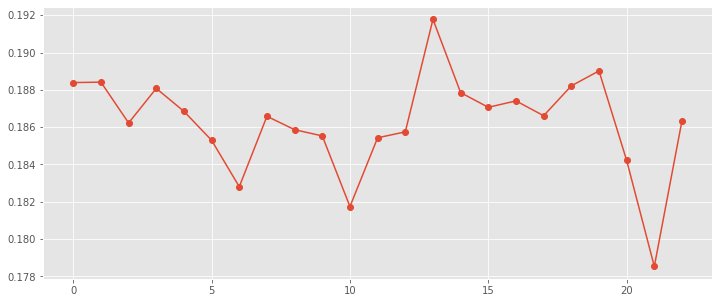

In [16]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.plot(range(len(prob)), prob, marker='o')